<a href="https://colab.research.google.com/github/FABI0LITA/mining_2022/blob/main/IT%EC%99%80%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4%ED%98%81%EC%8B%A0_Classification_2%EC%B0%A8%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[과정1] 의사결정나무 활용##

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/please_2.csv")
print(health.columns)
display(health.info())      
display(health.head()) 

Index(['age', 'SBP', 'DBP', 'BloodGlucose', 'hemoglobin', 'Proteinuria',
       'serum creatinine', 'AST', 'ALT', 'waist', 'y-GTP', 'smoke', 'drink'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               9858 non-null   int64  
 1   SBP               9858 non-null   int64  
 2   DBP               9858 non-null   int64  
 3   BloodGlucose      9858 non-null   int64  
 4   hemoglobin        9858 non-null   int64  
 5   Proteinuria       9858 non-null   int64  
 6   serum creatinine  9858 non-null   int64  
 7   AST               9858 non-null   int64  
 8   ALT               9858 non-null   int64  
 9   waist             9858 non-null   float64
 10  y-GTP             9858 non-null   int64  
 11  smoke             9858 non-null   int64  
 12  drink             9858 non-null   int64  
dtypes: float64

None

,age,SBP,DBP,BloodGlucose,hemoglobin,Proteinuria,serum creatinine,AST,ALT,waist,y-GTP,smoke,drink
0,9,127,79,90,15,1,1,21,27,72.1,21,1,1
1,13,110,73,87,13,1,1,18,15,81.0,15,1,1
2,12,123,80,102,13,1,1,27,25,70.0,7,1,1
3,13,134,84,146,16,1,1,65,97,90.8,72,1,1
4,12,144,89,110,12,1,1,18,17,75.2,14,1,1


In [16]:
health.describe()

,age,SBP,DBP,BloodGlucose,hemoglobin,Proteinuria,serum creatinine,AST,ALT,waist,y-GTP,smoke,drink
count,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,11.890343,124.667580,76.804626,103.798133,14.268919,1.119497,1.005376,27.601542,26.819842,82.348600,38.144451,1.009333,0.413167
std,2.137755,14.622821,9.929087,24.677369,1.582986,0.489852,0.242722,17.917758,23.784566,9.552186,58.318472,0.615575,0.492427
min,9.000000,77.000000,40.000000,55.000000,5.000000,1.000000,0.000000,3.000000,2.000000,53.000000,3.000000,0.000000,0.000000
25%,10.000000,115.000000,70.000000,91.000000,13.000000,1.000000,1.000000,20.000000,16.000000,76.000000,16.000000,1.000000,0.000000
50%,12.000000,124.000000,77.000000,99.000000,14.000000,1.000000,1.000000,24.000000,21.000000,82.000000,24.000000,1.000000,0.000000
75%,13.000000,134.000000,83.000000,109.000000,15.000000,1.000000,1.000000,30.000000,31.000000,88.800000,39.000000,1.000000,1.000000
max,18.000000,200.000000,130.000000,473.000000,20.000000,6.000000,9.000000,692.000000,1146.000000,134.000000,2322.000000,2.000000,1.000000


In [17]:
# 의사결정나무 만드는 과정 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

feature_cols=['age', 'SBP', 'DBP', 'BloodGlucose', 'hemoglobin', 'Proteinuria', 'serum creatinine', 'AST', 'ALT', 'waist', 'y-GTP', 'smoke']

X = health[feature_cols]
X=X.iloc[:9858]
y = health['drink']
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

      age  SBP  DBP  BloodGlucose  hemoglobin  Proteinuria  serum creatinine  \
0       9  127   79            90          15            1                 1   
1      13  110   73            87          13            1                 1   
2      12  123   80           102          13            1                 1   
3      13  134   84           146          16            1                 1   
4      12  144   89           110          12            1                 1   
...   ...  ...  ...           ...         ...          ...               ...   
9853   17  120   66           115          16            1                 1   
9854   13  120   75           120          14            1                 1   
9855   11  132   79           117          14            1                 1   
9856   12  116   75            86          16            1                 1   
9857   13  120   80           105          13            1                 1   

      AST  ALT  waist  y-GTP  smoke  
0

In [18]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "음주", "음주X"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [19]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.11985969 0.11135626 0.10735326 0.11730507 0.05350716 0.01349806
 0.0052931  0.08801946 0.09043741 0.08968474 0.12858504 0.07510075]


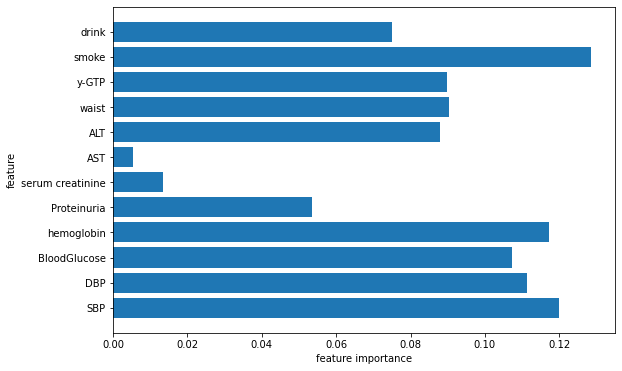

In [20]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns)  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree)

##의사결정나무_시사점 |


**시험용 데이터의 정확도는 60.9%로 유의미하다고 판단하기에는 어려웠다.** 해당 모델에서 종속변수는 drink(음주여부), 그리고 독립변수는 age(나이), SBP(수축기혈압), DBP(이완기혈압), BloodGlucose(식전혈당), hemoglobin(혈색소), proterinuria(요단백), serum creatin(혈청 크레아티닌), AST, ALT, waist(허리둘레), y-GTP(감마지티피), smoke(흡연여부), drink(음주여부) 이었다. 의사결정나무의 시험용 데이터 정확도가 낮은 것으로 미루어 볼 때, **음주여부는 다른 건강 데이터의 여부와 약한 상관성을 갖거나 의사결정나무의 모델이 해당 상관관계를 분석하기에 적합하지 않은 모델이라는 것을 확인할 수 있다.**


또한 중요 변수를 분석한 결과, AST와 serum creatinine(혈중 크레아티닌), 그리고 Proteinuria(요단백)이 의사결정나무에서 중요도가 매우 낮은 모델이라는 점을 분석할 수 있었다. 즉, 해당 변수들은 음주와 큰 상관성을 갖지 않는 것으로 판단된다.

##[과정2] 랜덤포레스트##

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=300,random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))



학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.704


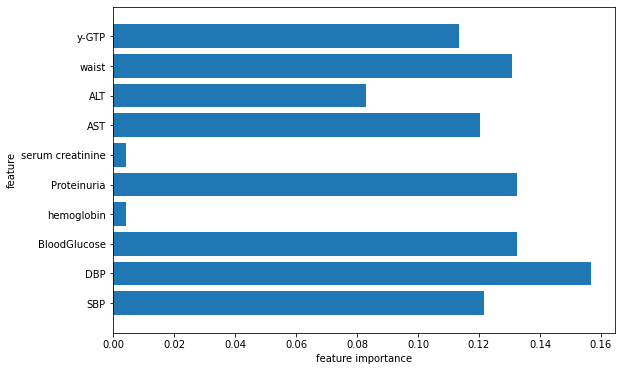

In [ ]:
import numpy as np
def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns)  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(forest)


##랜덤포레스트_시사점 |


분석 결과, 같은 데이터 설정환경에서 의사결정나무가 60.9%의 시험용 데이터 정확도를 보였던 반면 랜덤포레스트는 70.4%의 정확도를 도출했다. 이 또한 매우 높은 정확도라고 볼 수는 없으나, 앞선 시사점의 두 가지 가설 중에서 음주와 그 외 건강 데이터 간의 상관성이 약한 것보다 **의사결정나무가 적합한 모델이 아니었던 것이 의사결정나무에서의 낮은 정확도를 설명한다고 해석할 수 있다.** 

한편, 중요 변수를 분석한 결과가 의사결정나무와 매우 상이한 것을 알 수 있었다. 의사결정나무에서는 AST, serum creatinine (혈청 크레아티닌), Proterinuria(요단백) 해당 세 가지 변수가 매우 낮은 중요도를 가졌다. 그러나 랜덤포레스트 모델에서는 AST와 Proteinuria가 갖는 중요도가 컸고, serum creatinine과 hemolobin의 중요도가 매우 낮은 것으로 분석되었다. 이를 통해 serum creatinine(혈청 크레아티닌)은 음주와 유의미한 상관성이 없다는 것이 기정 사실화되었고, 나머지 변수들은 모델에 따라 오차 내지 차이를 갖는다는 것을 파악할 수 있었다.


종합하면,
1. 음주와 독립변수로 설정된 기타 건강 데이터 간에는 상관관계가 있다.
2. 해당 상관관계를 분석하는 데에는 의사결정나무보다 랜덤포레스트가 더욱 효과적인 모델이다.